In [6]:
import pandas as pd

df_returns = pd.read_csv("/Users/farhad/Desktop/mercedes-capm-timevarying/data/raw/processed/returns_merged.csv",
                         index_col=0, parse_dates=True)

df_returns.head()


,MBG,DAX
Price,,
2017-01-03,0.012842,-0.001216
2017-01-04,-0.000416,0.000006
2017-01-05,-0.000277,0.000054
2017-01-06,-0.000139,0.001214
2017-01-09,-0.000833,-0.003024


In [7]:
Y = df_returns["MBG"]
X = df_returns["DAX"]


In [8]:
window = 90


In [9]:
import statsmodels.api as sm

rolling_alpha = []
rolling_beta = []
rolling_dates = []


In [12]:
for i in range(window, len(df_returns)):
    # Select rolling window slice
    Y_window = Y.iloc[i - window:i]
    X_window = X.iloc[i - window:i]
    
    # Add constant inside the window
    X_window = sm.add_constant(X_window)
    
    # Fit OLS regression for this window
    model_window = sm.OLS(Y_window, X_window).fit()
    
    # Store results
    rolling_alpha.append(model_window.params["const"])
    rolling_beta.append(model_window.params["DAX"])
    rolling_dates.append(df_returns.index[i])


In [13]:
rolling_df = pd.DataFrame({
    "date": rolling_dates,
    "rolling_alpha": rolling_alpha,
    "rolling_beta": rolling_beta
})

rolling_df.set_index("date", inplace=True)
rolling_df.head()


,rolling_alpha,rolling_beta
date,,
2017-05-12,-0.000724,0.936275
2017-05-15,-0.000884,0.945330
2017-05-16,-0.000897,0.945175
2017-05-17,-0.000952,0.946655
2017-05-18,-0.000862,0.926568


In [15]:
rolling_df.to_csv("/Users/farhad/Desktop/mercedes-capm-timevarying/data/raw/processed/rolling_beta.csv")


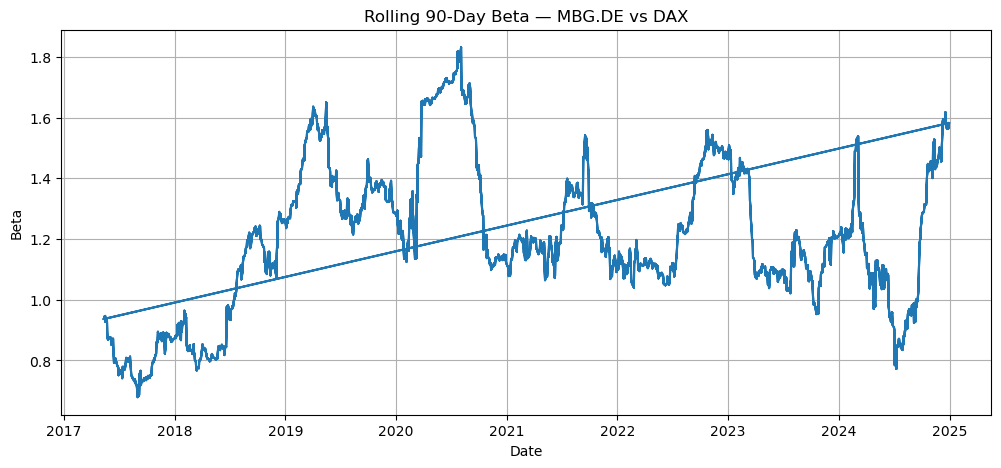

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(rolling_df["rolling_beta"])
plt.title("Rolling 90-Day Beta — MBG.DE vs DAX")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.grid(True)
plt.show()
